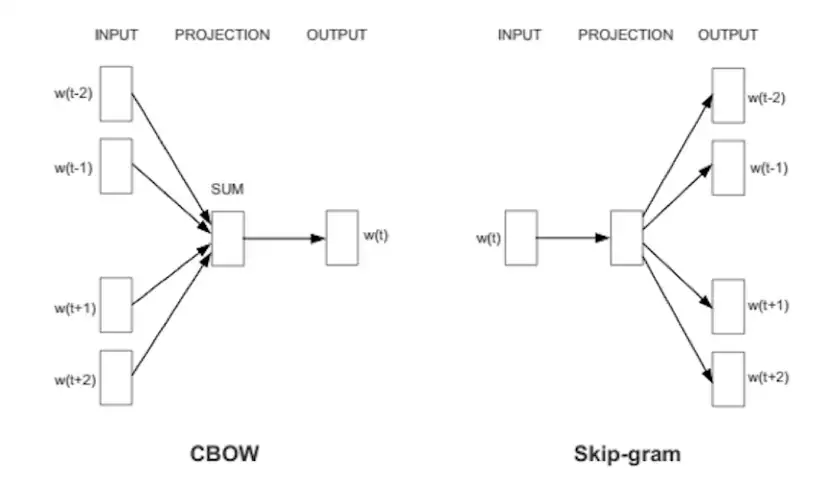

- Word Embedding
- Word2Vec
- Movie Sentiment Analysis

In [ ]:
# !pip install --upgrade gensim

In [297]:
import gensim
from gensim.models import Word2Vec

In [298]:
w2v = Word2Vec()

2022-11-15 21:01:19,767 : INFO : Word2Vec lifecycle event {'params': 'Word2Vec(vocab=0, vector_size=100, alpha=0.025)', 'datetime': '2022-11-15T21:01:19.767774', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19044-SP0', 'event': 'created'}


In [299]:
# Firstly, please note that the performance of google word2vec is better on big datasets. 
# In this example we are considering only 25000 training examples from the imdb dataset.
# Therefore, the performance is similar to the "bag of words" model.

# Importing libraries
import numpy as np
import pandas as pd
# BeautifulSoup is used to remove html tags from the text
from bs4 import BeautifulSoup 
import re # For regular expressions

# Stopwords can be useful to undersand the semantics of the sentence.
# Therefore stopwords are not removed while creating the word2vec model.
# But they will be removed  while averaging feature vectors.
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

In [307]:
# Read data from files
df = pd.read_csv("./input/labeledTrainData.tsv", header=0,\
                    delimiter="\t", quoting=3)

train, test = train_test_split(df, test_size=0.2)

In [308]:
test.head()

,id,sentiment,review
15840,"""7130_10""",1,"""Well, when before I saw this film I really wa..."
37,"""6827_4""",0,"""Dumb is as dumb does, in this thoroughly unin..."
22559,"""6850_3""",0,"""As a girl, Hinako moved away from her small v..."
4682,"""11752_3""",0,"""I like animated shows. I enjoy the Nick fare ..."
9503,"""7998_9""",1,"""I loved this movie. I'm a Mexican and was in ..."


In [310]:
test["review"][15840]

'"Well, when before I saw this film I really wasn\'t sure whether it would be my cup of tea...how wrong I was! I thought that this was one of the best films I\'ve watched for a very long time, a real family classic. The story of a young evacuee and his new \'foster\' dad, this film ticks all the boxes. I\'ve not read the book (maybe that\'s a good thing & meant I enjoyed the film more) but with regards to the story, I really can\'t think of any bad points, hence scoring it 10 out of 10 (and I hardly ever think anything warrants top marks!). By the time William proclaimed \'I CAN RIDE MY BIKE, DAD!\' I was sobbing my heart out (anyone who\'s seen it will understand, I\'m sure). Really heartwarming, and definitely recommended."'

In [311]:
print(train.shape, test.shape)

(20000, 3) (5000, 3)


In [313]:
# word2vec expects a list of lists.
# Using punkt tokenizer for better splitting of a paragraph into sentences.

import nltk.data
from nltk.tokenize import word_tokenize
#nltk.download('popular')

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
english_stopwords = set(stopwords.words("english"))

In [314]:
list(english_stopwords)[:10]

['mustn', 'himself', 'from', 'y', 'don', 'are', 'until', 'as', 'here', 'there']

In [315]:
tokenizer.tokenize("I am no one. Who are you?")

['I am no one.', 'Who are you?']

In [316]:
word_tokenize("Who are you?")

['Who', 'are', 'you', '?']

In [317]:
# This function converts a text to a sequence of words.
def review_wordlist(review, remove_stopwords=False):
    # 1. Removing html tags
    review_text = BeautifulSoup(review).get_text()
    # 2. Removing non-letter.
    review_text = re.sub("[^a-zA-Z]"," ",review_text)
    # 3. Converting to lower case and splitting
    words = review_text.lower().split()
    # 4. Optionally remove stopwords
    if remove_stopwords:
        stops = set(stopwords.words("english"))     
        words = [w for w in words if not w in stops]
    
    return(words)

In [318]:
# This function splits a review into sentences
def review_sentences(review, tokenizer, remove_stopwords=False):
    # 1. Using nltk tokenizer
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    # 2. Loop for each sentence
    for raw_sentence in raw_sentences:
        if len(raw_sentence)>0:
            sentences.append(review_wordlist(raw_sentence,\
                                            remove_stopwords))

    # This returns the list of lists
    return sentences


In [319]:
sentences = []
print("Parsing sentences from training set")
for review in train["review"]:
    sentences += review_sentences(review, tokenizer, remove_stopwords=False)

Parsing sentences from training set


C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [321]:
# Creating the model and setting values for the various parameters
num_features = 300  # Word vector dimensionality
min_word_count = 40 # Minimum word count
num_workers = 4     # Number of parallel threads
context = 10        # Context window size
downsampling = 1e-3 # (0.001) Downsample setting for frequent words

In [322]:
# Initializing the train model
from gensim.models import word2vec

In [323]:
model = word2vec.Word2Vec(sentences,\
                          workers=num_workers,\
                          vector_size=num_features,\
                          min_count=min_word_count,\
                          window=context,
                          sample=downsampling)

2022-11-15 21:11:47,435 : INFO : collecting all words and their counts
2022-11-15 21:11:47,436 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-11-15 21:11:47,478 : INFO : PROGRESS: at sentence #10000, processed 225444 words, keeping 17278 word types
2022-11-15 21:11:47,523 : INFO : PROGRESS: at sentence #20000, processed 446552 words, keeping 24256 word types
2022-11-15 21:11:47,563 : INFO : PROGRESS: at sentence #30000, processed 670166 words, keeping 29548 word types
2022-11-15 21:11:47,603 : INFO : PROGRESS: at sentence #40000, processed 897317 words, keeping 33750 word types
2022-11-15 21:11:47,638 : INFO : PROGRESS: at sentence #50000, processed 1115697 words, keeping 37156 word types
2022-11-15 21:11:47,676 : INFO : PROGRESS: at sentence #60000, processed 1335823 words, keeping 40161 word types
2022-11-15 21:11:47,719 : INFO : PROGRESS: at sentence #70000, processed 1560128 words, keeping 42968 word types
2022-11-15 21:11:47,758 : INFO : PROGRESS: 

2022-11-15 21:11:59,020 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-11-15 21:11:59,023 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-11-15 21:11:59,023 : INFO : EPOCH - 5 : training on 4752478 raw words (3204095 effective words) took 2.1s, 1515357 effective words/s
2022-11-15 21:11:59,024 : INFO : Word2Vec lifecycle event {'msg': 'training on 23762390 raw words (16017715 effective words) took 10.6s, 1515091 effective words/s', 'datetime': '2022-11-15T21:11:59.024060', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19044-SP0', 'event': 'train'}
2022-11-15 21:11:59,024 : INFO : Word2Vec lifecycle event {'params': 'Word2Vec(vocab=7209, vector_size=300, alpha=0.025)', 'datetime': '2022-11-15T21:11:59.024060', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19044-SP0', 'event': 'crea

In [328]:
# Few tests: This will print the odd word among them 
model.wv.doesnt_match("man woman dog child kitchen".split())

'alien'

In [329]:
model.wv.doesnt_match("france england germany berlin".split())

'berlin'

In [372]:
# This will print the most similar words present in the model
model.wv.most_similar("night")

[('morning', 0.759641170501709),
 ('afternoon', 0.7548197507858276),
 ('week', 0.6982744932174683),
 ('summer', 0.6443514823913574),
 ('weekend', 0.6384967565536499),
 ('evening', 0.6312835812568665),
 ('sunday', 0.6287060379981995),
 ('saturday', 0.6262202262878418),
 ('channels', 0.6104913949966431),
 ('month', 0.6052617430686951)]

In [338]:
model.wv.most_similar("awful")

[('horrible', 0.8322596549987793),
 ('terrible', 0.8022300004959106),
 ('dreadful', 0.7146121859550476),
 ('lame', 0.7016673684120178),
 ('stupid', 0.6718356013298035),
 ('laughable', 0.6649199724197388),
 ('bad', 0.6648830771446228),
 ('atrocious', 0.651492178440094),
 ('crappy', 0.6476753354072571),
 ('ridiculous', 0.6312220692634583)]

In [276]:
# This will give the total number of words in the vocabolary created from this dataset
len(model.wv.key_to_index)

7174

In [340]:
model.wv["man"].shape

(300,)

In [341]:
# Function to average all word vectors in a paragraph
def featureVecMethod(words, model, num_features):
    # Pre-initialising empty numpy array for speed
    featureVec = np.zeros(num_features,dtype="float32")
    nwords = 0
    
    #Converting Index2Word which is a list to a set for better speed in the execution.
    index2word_set = set(model.wv.index_to_key)
    
    for word in  words:
        if word in index2word_set:
            nwords = nwords + 1
            featureVec = np.add(featureVec,model.wv[word])
    
    # Dividing the result by number of words to get average
    featureVec = np.divide(featureVec, nwords)
    return featureVec

In [342]:
# Function for calculating the average feature vector
def getAvgFeatureVecs(reviews, model, num_features):
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        # Printing a status message every 1000th review
        if counter%1000 == 0:
            print("Review %d of %d"%(counter,len(reviews)))
            
        reviewFeatureVecs[counter] = featureVecMethod(review, model, num_features)
        counter = counter+1
        
    return reviewFeatureVecs

In [343]:
# Calculating average feature vector for training set
clean_train_reviews = []
for review in train['review']:
    clean_train_reviews.append(review_wordlist(review, remove_stopwords=True))
    
trainDataVecs = getAvgFeatureVecs(clean_train_reviews, model, num_features)
trainTargets = train["sentiment"].to_numpy()

Review 0 of 20000
Review 1000 of 20000
Review 2000 of 20000
Review 3000 of 20000
Review 4000 of 20000
Review 5000 of 20000
Review 6000 of 20000
Review 7000 of 20000
Review 8000 of 20000
Review 9000 of 20000
Review 10000 of 20000
Review 11000 of 20000
Review 12000 of 20000
Review 13000 of 20000
Review 14000 of 20000
Review 15000 of 20000
Review 16000 of 20000
Review 17000 of 20000
Review 18000 of 20000
Review 19000 of 20000


In [344]:
# Calculating average feature vactors for test set     
clean_test_reviews = []
for review in test["review"]:
    clean_test_reviews.append(review_wordlist(review,remove_stopwords=True))
    
testDataVecs = getAvgFeatureVecs(clean_test_reviews, model, num_features)
testTargets = test["sentiment"].to_numpy()

Review 0 of 5000
Review 1000 of 5000
Review 2000 of 5000
Review 3000 of 5000
Review 4000 of 5000


In [345]:
trainDataVecs.shape

(20000, 300)

In [346]:
trainTargets.shape

(20000,)

In [347]:
# Fitting a random forest classifier to the training data
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100)
    
print("Fitting random forest to training data....")    
forest = forest.fit(trainDataVecs, trainTargets)

Fitting random forest to training data....


In [348]:
# Predicting the sentiment values for test data and saving the results in a csv file 
testPredicts = forest.predict(testDataVecs)

In [287]:
from sklearn.metrics import classification_report, confusion_matrix

In [350]:
print(confusion_matrix(testTargets, testPredicts))

[[1975  561]
 [ 390 2074]]


In [288]:
print(classification_report(testTargets, testPredicts))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      2492
           1       0.80      0.83      0.82      2508

    accuracy                           0.81      5000
   macro avg       0.81      0.81      0.81      5000
weighted avg       0.81      0.81      0.81      5000



# Neural Network Model

In [351]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
from torch.utils.data import TensorDataset, DataLoader

In [352]:
train_x = torch.tensor(trainDataVecs) # transform to torch tensor
train_y = torch.tensor(trainTargets, dtype=torch.long)
test_x = torch.tensor(testDataVecs) # transform to torch tensor
test_y = torch.tensor(testTargets, dtype=torch.long)

In [357]:
train_loader = torch.utils.data.DataLoader(TensorDataset(train_x, train_y),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(TensorDataset(test_x, test_y),
    batch_size=batch_size_test, shuffle=True)

In [354]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(300, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
#         x = F.dropout(x, training=self.training)
        x = F.relu(self.fc2(x))
#         x = F.dropout(x, training=self.training)
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        return x

In [355]:
n_epochs = 50
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [356]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

In [291]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [359]:
def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    
    # Flatten MNIST images into a 784 long vector
    data = data.view(data.shape[0], -1)
    
    output = network(data)
    
    loss = F.nll_loss(output, target)
    
    loss.backward()
    optimizer.step()

    
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
      torch.save(network.state_dict(), 'model.pth')
      torch.save(optimizer.state_dict(), 'optimizer.pth')

In [360]:
def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      data = data.view(data.shape[0], -1)
      output = network(data)
        
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [361]:
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()

Train Epoch: 1 [0/20000 (0%)]	Loss: 0.697803
Train Epoch: 1 [640/20000 (3%)]	Loss: 0.684761
Train Epoch: 1 [1280/20000 (6%)]	Loss: 0.705106
Train Epoch: 1 [1920/20000 (10%)]	Loss: 0.688302
Train Epoch: 1 [2560/20000 (13%)]	Loss: 0.691676
Train Epoch: 1 [3200/20000 (16%)]	Loss: 0.685848
Train Epoch: 1 [3840/20000 (19%)]	Loss: 0.689045
Train Epoch: 1 [4480/20000 (22%)]	Loss: 0.691572
Train Epoch: 1 [5120/20000 (26%)]	Loss: 0.681071
Train Epoch: 1 [5760/20000 (29%)]	Loss: 0.682443
Train Epoch: 1 [6400/20000 (32%)]	Loss: 0.686119
Train Epoch: 1 [7040/20000 (35%)]	Loss: 0.688260
Train Epoch: 1 [7680/20000 (38%)]	Loss: 0.691114
Train Epoch: 1 [8320/20000 (42%)]	Loss: 0.682320
Train Epoch: 1 [8960/20000 (45%)]	Loss: 0.679359
Train Epoch: 1 [9600/20000 (48%)]	Loss: 0.677126
Train Epoch: 1 [10240/20000 (51%)]	Loss: 0.681568
Train Epoch: 1 [10880/20000 (54%)]	Loss: 0.685555
Train Epoch: 1 [11520/20000 (58%)]	Loss: 0.684096
Train Epoch: 1 [12160/20000 (61%)]	Loss: 0.674855
Train Epoch: 1 [12800/2

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Train Epoch: 2 [5120/20000 (26%)]	Loss: 0.631140
Train Epoch: 2 [5760/20000 (29%)]	Loss: 0.611544
Train Epoch: 2 [6400/20000 (32%)]	Loss: 0.618734
Train Epoch: 2 [7040/20000 (35%)]	Loss: 0.630209
Train Epoch: 2 [7680/20000 (38%)]	Loss: 0.620829
Train Epoch: 2 [8320/20000 (42%)]	Loss: 0.624199
Train Epoch: 2 [8960/20000 (45%)]	Loss: 0.584037
Train Epoch: 2 [9600/20000 (48%)]	Loss: 0.594226
Train Epoch: 2 [10240/20000 (51%)]	Loss: 0.594434
Train Epoch: 2 [10880/20000 (54%)]	Loss: 0.594748
Train Epoch: 2 [11520/20000 (58%)]	Loss: 0.612039
Train Epoch: 2 [12160/20000 (61%)]	Loss: 0.612109
Train Epoch: 2 [12800/20000 (64%)]	Loss: 0.564643
Train Epoch: 2 [13440/20000 (67%)]	Loss: 0.551309
Train Epoch: 2 [14080/20000 (70%)]	Loss: 0.599700
Train Epoch: 2 [14720/20000 (73%)]	Loss: 0.618106
Train Epoch: 2 [15360/20000 (77%)]	Loss: 0.551243
Train Epoch: 2 [16000/20000 (80%)]	Loss: 0.522379
Train Epoch: 2 [16640/20000 (83%)]	Loss: 0.600856
Train Epoch: 2 [17280/20000 (86%)]	Loss: 0.552225
Train Ep

Train Epoch: 7 [8320/20000 (42%)]	Loss: 0.280547
Train Epoch: 7 [8960/20000 (45%)]	Loss: 0.329821
Train Epoch: 7 [9600/20000 (48%)]	Loss: 0.369373
Train Epoch: 7 [10240/20000 (51%)]	Loss: 0.364502
Train Epoch: 7 [10880/20000 (54%)]	Loss: 0.304729
Train Epoch: 7 [11520/20000 (58%)]	Loss: 0.449436
Train Epoch: 7 [12160/20000 (61%)]	Loss: 0.448818
Train Epoch: 7 [12800/20000 (64%)]	Loss: 0.368648
Train Epoch: 7 [13440/20000 (67%)]	Loss: 0.323469
Train Epoch: 7 [14080/20000 (70%)]	Loss: 0.298210
Train Epoch: 7 [14720/20000 (73%)]	Loss: 0.242960
Train Epoch: 7 [15360/20000 (77%)]	Loss: 0.410349
Train Epoch: 7 [16000/20000 (80%)]	Loss: 0.428930
Train Epoch: 7 [16640/20000 (83%)]	Loss: 0.211708
Train Epoch: 7 [17280/20000 (86%)]	Loss: 0.334616
Train Epoch: 7 [17920/20000 (89%)]	Loss: 0.388694
Train Epoch: 7 [18560/20000 (93%)]	Loss: 0.436928
Train Epoch: 7 [19200/20000 (96%)]	Loss: 0.330764
Train Epoch: 7 [19840/20000 (99%)]	Loss: 0.324810

Test set: Avg. loss: 0.3784, Accuracy: 4183/5000 (84

Train Epoch: 12 [8960/20000 (45%)]	Loss: 0.278343
Train Epoch: 12 [9600/20000 (48%)]	Loss: 0.386505
Train Epoch: 12 [10240/20000 (51%)]	Loss: 0.247806
Train Epoch: 12 [10880/20000 (54%)]	Loss: 0.400326
Train Epoch: 12 [11520/20000 (58%)]	Loss: 0.432953
Train Epoch: 12 [12160/20000 (61%)]	Loss: 0.418129
Train Epoch: 12 [12800/20000 (64%)]	Loss: 0.338119
Train Epoch: 12 [13440/20000 (67%)]	Loss: 0.472593
Train Epoch: 12 [14080/20000 (70%)]	Loss: 0.459552
Train Epoch: 12 [14720/20000 (73%)]	Loss: 0.345079
Train Epoch: 12 [15360/20000 (77%)]	Loss: 0.488553
Train Epoch: 12 [16000/20000 (80%)]	Loss: 0.375094
Train Epoch: 12 [16640/20000 (83%)]	Loss: 0.350624
Train Epoch: 12 [17280/20000 (86%)]	Loss: 0.336647
Train Epoch: 12 [17920/20000 (89%)]	Loss: 0.477669
Train Epoch: 12 [18560/20000 (93%)]	Loss: 0.381825
Train Epoch: 12 [19200/20000 (96%)]	Loss: 0.325493
Train Epoch: 12 [19840/20000 (99%)]	Loss: 0.466371

Test set: Avg. loss: 0.3690, Accuracy: 4203/5000 (84%)

Train Epoch: 13 [0/20000 (0

Train Epoch: 17 [10880/20000 (54%)]	Loss: 0.340569
Train Epoch: 17 [11520/20000 (58%)]	Loss: 0.210599
Train Epoch: 17 [12160/20000 (61%)]	Loss: 0.375843
Train Epoch: 17 [12800/20000 (64%)]	Loss: 0.330180
Train Epoch: 17 [13440/20000 (67%)]	Loss: 0.460832
Train Epoch: 17 [14080/20000 (70%)]	Loss: 0.319526
Train Epoch: 17 [14720/20000 (73%)]	Loss: 0.345431
Train Epoch: 17 [15360/20000 (77%)]	Loss: 0.335301
Train Epoch: 17 [16000/20000 (80%)]	Loss: 0.343062
Train Epoch: 17 [16640/20000 (83%)]	Loss: 0.559176
Train Epoch: 17 [17280/20000 (86%)]	Loss: 0.379284
Train Epoch: 17 [17920/20000 (89%)]	Loss: 0.369172
Train Epoch: 17 [18560/20000 (93%)]	Loss: 0.442821
Train Epoch: 17 [19200/20000 (96%)]	Loss: 0.377568
Train Epoch: 17 [19840/20000 (99%)]	Loss: 0.295520

Test set: Avg. loss: 0.3689, Accuracy: 4196/5000 (84%)

Train Epoch: 18 [0/20000 (0%)]	Loss: 0.272078
Train Epoch: 18 [640/20000 (3%)]	Loss: 0.457217
Train Epoch: 18 [1280/20000 (6%)]	Loss: 0.274036
Train Epoch: 18 [1920/20000 (10%)]	

Train Epoch: 22 [9600/20000 (48%)]	Loss: 0.344172
Train Epoch: 22 [10240/20000 (51%)]	Loss: 0.429504
Train Epoch: 22 [10880/20000 (54%)]	Loss: 0.348193
Train Epoch: 22 [11520/20000 (58%)]	Loss: 0.299793
Train Epoch: 22 [12160/20000 (61%)]	Loss: 0.464277
Train Epoch: 22 [12800/20000 (64%)]	Loss: 0.281947
Train Epoch: 22 [13440/20000 (67%)]	Loss: 0.344750
Train Epoch: 22 [14080/20000 (70%)]	Loss: 0.325442
Train Epoch: 22 [14720/20000 (73%)]	Loss: 0.276776
Train Epoch: 22 [15360/20000 (77%)]	Loss: 0.453099
Train Epoch: 22 [16000/20000 (80%)]	Loss: 0.287898
Train Epoch: 22 [16640/20000 (83%)]	Loss: 0.357676
Train Epoch: 22 [17280/20000 (86%)]	Loss: 0.320036
Train Epoch: 22 [17920/20000 (89%)]	Loss: 0.262943
Train Epoch: 22 [18560/20000 (93%)]	Loss: 0.443728
Train Epoch: 22 [19200/20000 (96%)]	Loss: 0.298002
Train Epoch: 22 [19840/20000 (99%)]	Loss: 0.480510

Test set: Avg. loss: 0.3615, Accuracy: 4212/5000 (84%)

Train Epoch: 23 [0/20000 (0%)]	Loss: 0.312135
Train Epoch: 23 [640/20000 (3%)

Train Epoch: 27 [12800/20000 (64%)]	Loss: 0.312503
Train Epoch: 27 [13440/20000 (67%)]	Loss: 0.342853
Train Epoch: 27 [14080/20000 (70%)]	Loss: 0.365848
Train Epoch: 27 [14720/20000 (73%)]	Loss: 0.228343
Train Epoch: 27 [15360/20000 (77%)]	Loss: 0.264812
Train Epoch: 27 [16000/20000 (80%)]	Loss: 0.407089
Train Epoch: 27 [16640/20000 (83%)]	Loss: 0.289750
Train Epoch: 27 [17280/20000 (86%)]	Loss: 0.357510
Train Epoch: 27 [17920/20000 (89%)]	Loss: 0.453546
Train Epoch: 27 [18560/20000 (93%)]	Loss: 0.391407
Train Epoch: 27 [19200/20000 (96%)]	Loss: 0.488181
Train Epoch: 27 [19840/20000 (99%)]	Loss: 0.420875

Test set: Avg. loss: 0.3601, Accuracy: 4226/5000 (85%)

Train Epoch: 28 [0/20000 (0%)]	Loss: 0.415071
Train Epoch: 28 [640/20000 (3%)]	Loss: 0.308009
Train Epoch: 28 [1280/20000 (6%)]	Loss: 0.377161
Train Epoch: 28 [1920/20000 (10%)]	Loss: 0.309452
Train Epoch: 28 [2560/20000 (13%)]	Loss: 0.302032
Train Epoch: 28 [3200/20000 (16%)]	Loss: 0.310477
Train Epoch: 28 [3840/20000 (19%)]	Los

Train Epoch: 32 [11520/20000 (58%)]	Loss: 0.276080
Train Epoch: 32 [12160/20000 (61%)]	Loss: 0.312473
Train Epoch: 32 [12800/20000 (64%)]	Loss: 0.317471
Train Epoch: 32 [13440/20000 (67%)]	Loss: 0.275748
Train Epoch: 32 [14080/20000 (70%)]	Loss: 0.333404
Train Epoch: 32 [14720/20000 (73%)]	Loss: 0.378609
Train Epoch: 32 [15360/20000 (77%)]	Loss: 0.341620
Train Epoch: 32 [16000/20000 (80%)]	Loss: 0.302639
Train Epoch: 32 [16640/20000 (83%)]	Loss: 0.334362
Train Epoch: 32 [17280/20000 (86%)]	Loss: 0.427579
Train Epoch: 32 [17920/20000 (89%)]	Loss: 0.249119
Train Epoch: 32 [18560/20000 (93%)]	Loss: 0.448261
Train Epoch: 32 [19200/20000 (96%)]	Loss: 0.341758
Train Epoch: 32 [19840/20000 (99%)]	Loss: 0.337790

Test set: Avg. loss: 0.3706, Accuracy: 4191/5000 (84%)

Train Epoch: 33 [0/20000 (0%)]	Loss: 0.257478
Train Epoch: 33 [640/20000 (3%)]	Loss: 0.320232
Train Epoch: 33 [1280/20000 (6%)]	Loss: 0.278216
Train Epoch: 33 [1920/20000 (10%)]	Loss: 0.386932
Train Epoch: 33 [2560/20000 (13%)]	L

Train Epoch: 37 [12800/20000 (64%)]	Loss: 0.358023
Train Epoch: 37 [13440/20000 (67%)]	Loss: 0.390041
Train Epoch: 37 [14080/20000 (70%)]	Loss: 0.261931
Train Epoch: 37 [14720/20000 (73%)]	Loss: 0.300954
Train Epoch: 37 [15360/20000 (77%)]	Loss: 0.401381
Train Epoch: 37 [16000/20000 (80%)]	Loss: 0.303058
Train Epoch: 37 [16640/20000 (83%)]	Loss: 0.456017
Train Epoch: 37 [17280/20000 (86%)]	Loss: 0.486202
Train Epoch: 37 [17920/20000 (89%)]	Loss: 0.449877
Train Epoch: 37 [18560/20000 (93%)]	Loss: 0.333392
Train Epoch: 37 [19200/20000 (96%)]	Loss: 0.271654
Train Epoch: 37 [19840/20000 (99%)]	Loss: 0.327076

Test set: Avg. loss: 0.3560, Accuracy: 4247/5000 (85%)

Train Epoch: 38 [0/20000 (0%)]	Loss: 0.440431
Train Epoch: 38 [640/20000 (3%)]	Loss: 0.369354
Train Epoch: 38 [1280/20000 (6%)]	Loss: 0.308662
Train Epoch: 38 [1920/20000 (10%)]	Loss: 0.301236
Train Epoch: 38 [2560/20000 (13%)]	Loss: 0.373723
Train Epoch: 38 [3200/20000 (16%)]	Loss: 0.330272
Train Epoch: 38 [3840/20000 (19%)]	Los

Train Epoch: 42 [11520/20000 (58%)]	Loss: 0.343509
Train Epoch: 42 [12160/20000 (61%)]	Loss: 0.314649
Train Epoch: 42 [12800/20000 (64%)]	Loss: 0.447936
Train Epoch: 42 [13440/20000 (67%)]	Loss: 0.308530
Train Epoch: 42 [14080/20000 (70%)]	Loss: 0.247454
Train Epoch: 42 [14720/20000 (73%)]	Loss: 0.382317
Train Epoch: 42 [15360/20000 (77%)]	Loss: 0.399842
Train Epoch: 42 [16000/20000 (80%)]	Loss: 0.326721
Train Epoch: 42 [16640/20000 (83%)]	Loss: 0.294429
Train Epoch: 42 [17280/20000 (86%)]	Loss: 0.319504
Train Epoch: 42 [17920/20000 (89%)]	Loss: 0.341459
Train Epoch: 42 [18560/20000 (93%)]	Loss: 0.299090
Train Epoch: 42 [19200/20000 (96%)]	Loss: 0.307918
Train Epoch: 42 [19840/20000 (99%)]	Loss: 0.383271

Test set: Avg. loss: 0.3688, Accuracy: 4185/5000 (84%)

Train Epoch: 43 [0/20000 (0%)]	Loss: 0.321052
Train Epoch: 43 [640/20000 (3%)]	Loss: 0.415246
Train Epoch: 43 [1280/20000 (6%)]	Loss: 0.345343
Train Epoch: 43 [1920/20000 (10%)]	Loss: 0.481730
Train Epoch: 43 [2560/20000 (13%)]	L

Train Epoch: 47 [16640/20000 (83%)]	Loss: 0.294051
Train Epoch: 47 [17280/20000 (86%)]	Loss: 0.255379
Train Epoch: 47 [17920/20000 (89%)]	Loss: 0.390328
Train Epoch: 47 [18560/20000 (93%)]	Loss: 0.328786
Train Epoch: 47 [19200/20000 (96%)]	Loss: 0.301554
Train Epoch: 47 [19840/20000 (99%)]	Loss: 0.212821

Test set: Avg. loss: 0.3558, Accuracy: 4234/5000 (85%)

Train Epoch: 48 [0/20000 (0%)]	Loss: 0.292332
Train Epoch: 48 [640/20000 (3%)]	Loss: 0.395964
Train Epoch: 48 [1280/20000 (6%)]	Loss: 0.385562
Train Epoch: 48 [1920/20000 (10%)]	Loss: 0.326508
Train Epoch: 48 [2560/20000 (13%)]	Loss: 0.260792
Train Epoch: 48 [3200/20000 (16%)]	Loss: 0.291982
Train Epoch: 48 [3840/20000 (19%)]	Loss: 0.331562
Train Epoch: 48 [4480/20000 (22%)]	Loss: 0.347904
Train Epoch: 48 [5120/20000 (26%)]	Loss: 0.348518
Train Epoch: 48 [5760/20000 (29%)]	Loss: 0.281788
Train Epoch: 48 [6400/20000 (32%)]	Loss: 0.364887
Train Epoch: 48 [7040/20000 (35%)]	Loss: 0.344805
Train Epoch: 48 [7680/20000 (38%)]	Loss: 0.3

In [363]:
import matplotlib.pyplot as plt

ValueError: x and y must be the same size

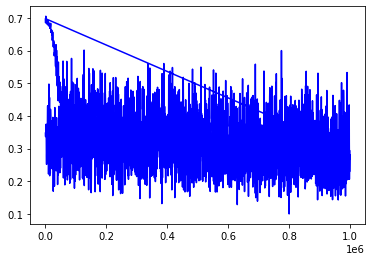

In [364]:
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
plt.show()

In [365]:
network.eval()
pred_y = torch.max(network(test_x), axis=1).indices.detach()

In [366]:
print(confusion_matrix(test_y, pred_y))

[[2162  374]
 [ 390 2074]]


In [368]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2536
           1       0.85      0.84      0.84      2464

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



# Telugu

In [369]:
# Read data from files
df = pd.read_csv("./input/telugu_books.csv")

In [370]:
df.head()

,SNo,text
0,0,\r\n సుశీలమ్మ కళ్ళలో భయం పారాడింది.\r\n ...
1,1,...
2,2,"""ఎలా వుంది ఫ్రెండ్..... ""\n\r\n ""టప్ టప..."
3,3,"""అది ఊరుకున్నా మీరు వుండలేరు. మీరిద్దరే ..."
4,4,అయన అలా వెళ్ళిపోగానే గుమ్మం పక్కనుంచి రాజ...


In [376]:
df = df.dropna()

In [381]:
sentences = []
for i, row in df.iterrows():
    if row["text"]:
        for sent in row["text"].split("."):
            sentences.append(sent.split())
    

In [382]:
len(sentences)

2759212

In [383]:
sentences[0]

['సుశీలమ్మ', 'కళ్ళలో', 'భయం', 'పారాడింది']

In [385]:
model = word2vec.Word2Vec(sentences,\
                          workers=num_workers,\
                          vector_size=num_features,\
                          min_count=10,\
                          window=context,
                          sample=downsampling)

2022-11-15 21:46:32,602 : INFO : collecting all words and their counts
2022-11-15 21:46:32,603 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-11-15 21:46:32,619 : INFO : PROGRESS: at sentence #10000, processed 47966 words, keeping 22060 word types
2022-11-15 21:46:32,637 : INFO : PROGRESS: at sentence #20000, processed 105993 words, keeping 42970 word types
2022-11-15 21:46:32,654 : INFO : PROGRESS: at sentence #30000, processed 156302 words, keeping 58060 word types
2022-11-15 21:46:32,673 : INFO : PROGRESS: at sentence #40000, processed 207835 words, keeping 72826 word types
2022-11-15 21:46:32,691 : INFO : PROGRESS: at sentence #50000, processed 259907 words, keeping 86442 word types
2022-11-15 21:46:32,711 : INFO : PROGRESS: at sentence #60000, processed 309578 words, keeping 98322 word types
2022-11-15 21:46:32,727 : INFO : PROGRESS: at sentence #70000, processed 359152 words, keeping 110595 word types
2022-11-15 21:46:32,744 : INFO : PROGRESS: at 

2022-11-15 21:46:33,989 : INFO : PROGRESS: at sentence #720000, processed 3742490 words, keeping 615753 word types
2022-11-15 21:46:34,007 : INFO : PROGRESS: at sentence #730000, processed 3791259 words, keeping 621365 word types
2022-11-15 21:46:34,029 : INFO : PROGRESS: at sentence #740000, processed 3846772 words, keeping 628290 word types
2022-11-15 21:46:34,049 : INFO : PROGRESS: at sentence #750000, processed 3895769 words, keeping 633976 word types
2022-11-15 21:46:34,070 : INFO : PROGRESS: at sentence #760000, processed 3950290 words, keeping 640445 word types
2022-11-15 21:46:34,091 : INFO : PROGRESS: at sentence #770000, processed 4001803 words, keeping 646203 word types
2022-11-15 21:46:34,110 : INFO : PROGRESS: at sentence #780000, processed 4051656 words, keeping 652340 word types
2022-11-15 21:46:34,132 : INFO : PROGRESS: at sentence #790000, processed 4101752 words, keeping 658021 word types
2022-11-15 21:46:34,156 : INFO : PROGRESS: at sentence #800000, processed 415225

2022-11-15 21:46:35,371 : INFO : PROGRESS: at sentence #1430000, processed 7382083 words, keeping 999002 word types
2022-11-15 21:46:35,388 : INFO : PROGRESS: at sentence #1440000, processed 7435622 words, keeping 1004582 word types
2022-11-15 21:46:35,406 : INFO : PROGRESS: at sentence #1450000, processed 7482047 words, keeping 1008676 word types
2022-11-15 21:46:35,423 : INFO : PROGRESS: at sentence #1460000, processed 7533614 words, keeping 1013544 word types
2022-11-15 21:46:35,440 : INFO : PROGRESS: at sentence #1470000, processed 7586180 words, keeping 1018560 word types
2022-11-15 21:46:35,458 : INFO : PROGRESS: at sentence #1480000, processed 7642514 words, keeping 1023890 word types
2022-11-15 21:46:35,476 : INFO : PROGRESS: at sentence #1490000, processed 7694740 words, keeping 1029027 word types
2022-11-15 21:46:35,493 : INFO : PROGRESS: at sentence #1500000, processed 7746820 words, keeping 1033781 word types
2022-11-15 21:46:35,510 : INFO : PROGRESS: at sentence #1510000, 

2022-11-15 21:46:36,630 : INFO : PROGRESS: at sentence #2130000, processed 11025867 words, keeping 1323427 word types
2022-11-15 21:46:36,648 : INFO : PROGRESS: at sentence #2140000, processed 11077765 words, keeping 1327916 word types
2022-11-15 21:46:36,665 : INFO : PROGRESS: at sentence #2150000, processed 11128296 words, keeping 1332123 word types
2022-11-15 21:46:36,684 : INFO : PROGRESS: at sentence #2160000, processed 11178724 words, keeping 1336370 word types
2022-11-15 21:46:36,701 : INFO : PROGRESS: at sentence #2170000, processed 11226623 words, keeping 1340093 word types
2022-11-15 21:46:36,720 : INFO : PROGRESS: at sentence #2180000, processed 11279990 words, keeping 1344870 word types
2022-11-15 21:46:36,737 : INFO : PROGRESS: at sentence #2190000, processed 11330825 words, keeping 1348864 word types
2022-11-15 21:46:36,754 : INFO : PROGRESS: at sentence #2200000, processed 11382491 words, keeping 1353446 word types
2022-11-15 21:46:36,776 : INFO : PROGRESS: at sentence #

2022-11-15 21:46:39,088 : INFO : deleting the raw counts dictionary of 1579105 items
2022-11-15 21:46:39,135 : INFO : sample=0.001 downsamples 21 most-common words
2022-11-15 21:46:39,136 : INFO : Word2Vec lifecycle event {'msg': 'downsampling leaves estimated 11403901.621098008 word corpus (96.4%% of prior 11834858)', 'datetime': '2022-11-15T21:46:39.136651', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19044-SP0', 'event': 'prepare_vocab'}
2022-11-15 21:46:39,997 : INFO : estimated required memory for 106321 words and 300 dimensions: 308330900 bytes
2022-11-15 21:46:39,997 : INFO : resetting layer weights
2022-11-15 21:46:40,160 : INFO : Word2Vec lifecycle event {'update': False, 'trim_rule': 'None', 'datetime': '2022-11-15T21:46:40.160304', 'gensim': '4.1.2', 'python': '3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19044-SP0', 'event': 'build_vocab'}
202

2022-11-15 21:47:29,902 : INFO : EPOCH 4 - PROGRESS: at 20.27% examples, 774074 words/s, in_qsize 8, out_qsize 0
2022-11-15 21:47:30,912 : INFO : EPOCH 4 - PROGRESS: at 27.11% examples, 771807 words/s, in_qsize 7, out_qsize 0
2022-11-15 21:47:31,920 : INFO : EPOCH 4 - PROGRESS: at 34.64% examples, 782347 words/s, in_qsize 7, out_qsize 0
2022-11-15 21:47:32,923 : INFO : EPOCH 4 - PROGRESS: at 41.68% examples, 788132 words/s, in_qsize 8, out_qsize 0
2022-11-15 21:47:33,932 : INFO : EPOCH 4 - PROGRESS: at 49.17% examples, 795319 words/s, in_qsize 7, out_qsize 0
2022-11-15 21:47:34,934 : INFO : EPOCH 4 - PROGRESS: at 56.36% examples, 797271 words/s, in_qsize 7, out_qsize 0
2022-11-15 21:47:35,939 : INFO : EPOCH 4 - PROGRESS: at 63.57% examples, 799636 words/s, in_qsize 8, out_qsize 0
2022-11-15 21:47:36,947 : INFO : EPOCH 4 - PROGRESS: at 70.77% examples, 802039 words/s, in_qsize 7, out_qsize 0
2022-11-15 21:47:37,947 : INFO : EPOCH 4 - PROGRESS: at 78.33% examples, 807329 words/s, in_qsiz

In [388]:
sentences[2]

['"అది', 'మనం', 'పెంచేదాన్ని', 'బట్టి', 'వుంటుంది']

In [391]:
model.wv.most_similar("వుంటుంది")

[('ఉంటుంది', 0.9151905179023743),
 ('వుండాలి', 0.7942715287208557),
 ('వుండేది', 0.7744193077087402),
 ('ఉండాలి', 0.7373925447463989),
 ('వుండొచ్చు', 0.7358030080795288),
 ('వుండవచ్చు', 0.706178605556488),
 ('ఉండేది', 0.7039719820022583),
 ('వుంటాయి', 0.6993141174316406),
 ('వుంటుంది"', 0.6821180582046509),
 ('వుంటుందని', 0.6635021567344666)]

In [392]:
model.wv.doesnt_match(['"అది', 'మనం', 'పెంచేదాన్ని', 'బట్టి', 'వుంటుంది'])

2022-11-15 21:50:52,585 : WARNING : vectors for words {'పెంచేదాన్ని'} are not present in the model, ignoring these words


'"అది'